In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [43]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [44]:
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
128,6.4,2.8,5.6,2.1
38,4.4,3.0,1.3,0.2
133,6.3,2.8,5.1,1.5
82,5.8,2.7,3.9,1.2


In [45]:
y.sample(5)

5      0
98     1
123    2
83     1
60     1
Name: target, dtype: int32

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
clf = LogisticRegression(multi_class='multinomial')
pca = PCA(n_components=2)
X_train_dec = pca.fit_transform(X_train)
X_test_dec = pca.transform(X_test)
clf.fit(X_train_dec,y_train)
y_preds = clf.predict(X_test_dec)
print("----------------Classification report of multiclass classification----------")
print(classification_report(y_test,y_preds))

----------------Classification report of multiclass classification----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

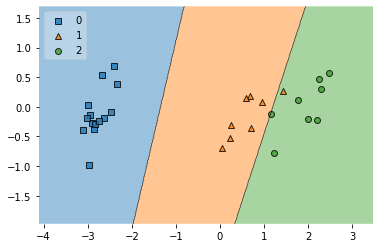

In [50]:
from mlxtend.plotting import plot_decision_regions
value=1.5
width=0.75
plot_decision_regions(X_test_dec,y_test.values,clf,legend=2)
